# Content
- Introduction
- Load Libraries
- Overview Of The Table
- Data Preparation
- Data Exploration
    - Top countries With Highest GDP
    - Correlation Between Variables
    - Top Factors Affecting GDP 
- Modeling
    - Visualization Of Results
- References

## Introduction
In this project, I am investigating the dataset containing information on population, inflation, unemployment, trade, market capitalization,central government debts and more of top 10 countries with highest GDP. I will be focusing on the factors that's affecting a country's GDP growth(annual %) and try to make a model using the data from the dataset. I will also briefly discuss the GDP per capita and forecasting GDP growth(annual %) predictions for the future.

## Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', 200)
from matplotlib.pyplot import figure
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy as scipy
import plotly.express as px

## Overview of the Table

In [2]:
gdp_file_path = r"C:\Users\parka\LHL Week 15\Final Capstone Project - GDP Analysis\data\GDP_Data_Transformed.csv"
gdp_df=pd.read_csv(gdp_file_path)
gdp_df

Country Name Country Code    Series Name  GDP (current US$)  \
0           Brazil          BRA  1998 [YR1998]       8.637110e+11   
1           Brazil          BRA  1999 [YR1999]       5.996420e+11   
2           Brazil          BRA  2000 [YR2000]       6.554480e+11   
3           Brazil          BRA  2001 [YR2001]       5.599840e+11   
4           Brazil          BRA  2002 [YR2002]       5.097950e+11   
..             ...          ...            ...                ...   
245  United States          USA  2018 [YR2018]       2.053310e+13   
246  United States          USA  2019 [YR2019]       2.138100e+13   
247  United States          USA  2020 [YR2020]       2.106050e+13   
248  United States          USA  2021 [YR2021]       2.331510e+13   
249  United States          USA  2022 [YR2022]       2.546270e+13   

     GDP per capita, PPP (current international $)  \
0                                      8503.697887   
1                                      8541.710725   
2                                      8994.743062   
3                                      9202.876484   
4                                      9510.823883   
..                                             ...   
245                                   62823.309440   
246                                   65120.394660   
247                                   63528.634300   
248                                   70219.472450   
249                                   76398.591740   

     GDP per capita (current US$)  GDP growth (annual %)  \
0                     5049.766120               0.338098   
1                     3456.423595               0.467938   
2                     3726.811420               4.387949   
3                     3142.235528               1.389896   
4                     2824.715396               3.053462   
..                            ...                    ...   
245                  62823.309440               2.945385   
246                  65120.394660               2.294439   
247                  63528.634300              -2.767803   
248                  70219.472450               5.945485   
249                  76398.591740               2.061593   

     Imports of goods and services (% of GDP)  \
0                                    9.408085   
1                                   11.417268   
2                                   12.451713   
3                                   14.564574   
4                                   13.387767   
..                                        ...   
245                                 15.249390   
246                                 14.579479   
247                                 13.181636   
248                                 14.588674   
249                                  0.000000   

     Inflation, consumer prices (annual %)  \
0                                 3.195076   
1                                 4.858447   
2                                 7.044141   
3                                 6.840359   
4                                 8.450164   
..                                     ...   
245                               2.442583   
246                               1.812210   
247                               1.233584   
248                               4.697859   
249                               8.002800   

     Inflation, GDP deflator (annual %)  \
0                              4.924362   
1                              8.010501   
2                              5.606065   
3                              8.225094   
4                              9.798112   
..                                  ...   
245                            2.404059   
246                            1.793931   
247                            1.304912   
248                            4.492792   
249                            7.005276   

     Exports of goods and services (% of GDP)  \
0                                    7.030500   
1                                    9.564898   
2

## Data Cleaning

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country Name                                                              250 non-null    object 
 1   Country Code                                                              250 non-null    object 
 2   Series Name                                                               250 non-null    object 
 3   GDP (current US$)                                                         250 non-null    float64
 4   GDP per capita, PPP (current international $)                             250 non-null    float64
 5   GDP per capita (current US$)                                              250 non-null    float64
 6   GDP growth (annual %)                                             

In [4]:
gdp_df.describe()

GDP (current US$)  GDP per capita, PPP (current international $)  \
count       2.500000e+02                                     250.000000   
mean        4.258563e+12                                   30561.073946   
std         4.813318e+12                                   16717.613874   
min         4.213510e+11                                    1847.256696   
25%         1.679068e+12                                   14975.580448   
50%         2.482180e+12                                   33590.957565   
75%         4.252732e+12                                   42285.964755   
max         2.546270e+13                                   76398.591740   

       GDP per capita (current US$)  GDP growth (annual %)  \
count                    250.000000             250.000000   
mean                   29192.633505               2.678547   
std                    18117.497694               3.540622   
min                      412.509356             -11.030858   
25%                     8968.510447               1.059356   
50%                    34695.172785               2.234319   
75%                    42274.377318               4.051475   
max                    76398.591740              14.230861   

       Imports of goods and services (% of GDP)  \
count                                250.000000   
mean                                  23.872240   
std                                    8.787322   
min                                    0.000000   
25%                                   15.826041   
50%                                   24.948285   
75%                                   30.509384   
max                                   48.281300   

       Inflation, consumer prices (annual %)  \
count                             250.000000   
mean                                2.648576   
std                                 2.588776   
min                                -1.401473   
25%                                 1.112502   
50%                                 1.978716   
75%                                 3.388774   
max                                14.714920   

       Inflation, GDP deflator (annual %)  \
count                          250.000000   
mean                             2.718983   
std                              2.774061   
min                             -2.313985   
25%                              1.068470   
50%                              1.940470   
75%                              3.457750   
max                             14.091022   

       Exports of goods and services (% of GDP)  \
count                                250.000000   
mean                                  24.063025   
std                                   10.091952   
min                                    0.000000   
25%                                   15.006131   
50%                                   24.600173   
75%                                   30.538101   
max                                   50.337854   

       Central government debt, total (% of GDP)  \
count                                 250.000000   
mean                                   55.390013   
std                                    56.125074   
min                                     0.000000   
25%                                     0.000000   
50%                                    53.990950   
75%                                    90.288154   
max                                   217.614224   

       Total reserves (% of total external debt)  Trade (% of GDP)  \
count                                 250.000000        250.000000   
mean                                   36.667045         47.935265   
std                                    82.999269         18.682365   
min                                     0.000000          0.000000   
25%                                     0.000000         30.263948   
50%                                     0.000000         50.076644   
75%                                    34.855119      

In [5]:
gdp_df.isnull().sum()

Country Name                                                                0
Country Code                                                                0
Series Name                                                                 0
GDP (current US$)                                                           0
GDP per capita, PPP (current international $)                               0
GDP per capita (current US$)                                                0
GDP growth (annual %)                                                       0
Imports of goods and services (% of GDP)                                    0
Inflation, consumer prices (annual %)                                       0
Inflation, GDP deflator (annual %)                                          0
Exports of goods and services (% of GDP)                                    0
Central government debt, total (% of GDP)                                   0
Total reserves (% of total external debt)                       

In [6]:
#(how many or count of) unique values in each of these columns
gdp_df.nunique()

Country Name                                                                 10
Country Code                                                                 10
Series Name                                                                  25
GDP (current US$)                                                           250
GDP per capita, PPP (current international $)                               250
GDP per capita (current US$)                                                250
GDP growth (annual %)                                                       250
Imports of goods and services (% of GDP)                                    249
Inflation, consumer prices (annual %)                                       250
Inflation, GDP deflator (annual %)                                          250
Exports of goods and services (% of GDP)                                    249
Central government debt, total (% of GDP)                                   154
Total reserves (% of total external debt

In [7]:
# Fill up missing values with median values
pd.set_option('mode.chained_assignment', None)
for col in gdp_df.columns.values:
    if gdp_df[col].isnull().sum() == 0:
        continue
    fill_values = gdp_df.groupby('Country Name')[col].median()
    for country in gdp_df['Country Name'].unique():
        gdp_df[col].loc[(gdp_df[col].isnull())&(gdp_df['Country Name']==country)] = fill_values[country]

In [8]:
gdp_df

Country Name Country Code    Series Name  GDP (current US$)  \
0           Brazil          BRA  1998 [YR1998]       8.637110e+11   
1           Brazil          BRA  1999 [YR1999]       5.996420e+11   
2           Brazil          BRA  2000 [YR2000]       6.554480e+11   
3           Brazil          BRA  2001 [YR2001]       5.599840e+11   
4           Brazil          BRA  2002 [YR2002]       5.097950e+11   
..             ...          ...            ...                ...   
245  United States          USA  2018 [YR2018]       2.053310e+13   
246  United States          USA  2019 [YR2019]       2.138100e+13   
247  United States          USA  2020 [YR2020]       2.106050e+13   
248  United States          USA  2021 [YR2021]       2.331510e+13   
249  United States          USA  2022 [YR2022]       2.546270e+13   

     GDP per capita, PPP (current international $)  \
0                                      8503.697887   
1                                      8541.710725   
2                                      8994.743062   
3                                      9202.876484   
4                                      9510.823883   
..                                             ...   
245                                   62823.309440   
246                                   65120.394660   
247                                   63528.634300   
248                                   70219.472450   
249                                   76398.591740   

     GDP per capita (current US$)  GDP growth (annual %)  \
0                     5049.766120               0.338098   
1                     3456.423595               0.467938   
2                     3726.811420               4.387949   
3                     3142.235528               1.389896   
4                     2824.715396               3.053462   
..                            ...                    ...   
245                  62823.309440               2.945385   
246                  65120.394660               2.294439   
247                  63528.634300              -2.767803   
248                  70219.472450               5.945485   
249                  76398.591740               2.061593   

     Imports of goods and services (% of GDP)  \
0                                    9.408085   
1                                   11.417268   
2                                   12.451713   
3                                   14.564574   
4                                   13.387767   
..                                        ...   
245                                 15.249390   
246                                 14.579479   
247                                 13.181636   
248                                 14.588674   
249                                  0.000000   

     Inflation, consumer prices (annual %)  \
0                                 3.195076   
1                                 4.858447   
2                                 7.044141   
3                                 6.840359   
4                                 8.450164   
..                                     ...   
245                               2.442583   
246                               1.812210   
247                               1.233584   
248                               4.697859   
249                               8.002800   

     Inflation, GDP deflator (annual %)  \
0                              4.924362   
1                              8.010501   
2                              5.606065   
3                              8.225094   
4                              9.798112   
..                                  ...   
245                            2.404059   
246                            1.793931   
247                            1.304912   
248                            4.492792   
249                            7.005276   

     Exports of goods and services (% of GDP)  \
0                                    7.030500   
1                                    9.564898   
2

## Exploratory Data Analysis

Top Countries With Highest GDP

Look at the top 10 countries with highest GDP growth (annual %). China is the leading country for the past 25 years in GDP growth followed by India, United States, Canada, and Brazil. The next 5 countries are close to each other. 

In [9]:
top_gdp_countries_GDPPercent = gdp_df.sort_values('GDP growth (annual %)',ascending=False)
df=top_gdp_countries_GDPPercent[['Country Name','Series Name','GDP growth (annual %)']]
df.groupby('Country Name').mean(numeric_only=True)

GDP growth (annual %)
Country Name                         
Brazil                       2.151655
Canada                       2.232696
China                        8.378855
France                       1.496592
Germany                      1.275557
India                        6.178521
Italy                        0.530741
Japan                        0.558948
United Kingdom               1.733310
United States                2.248596

GDP Annual Growth % per Year 

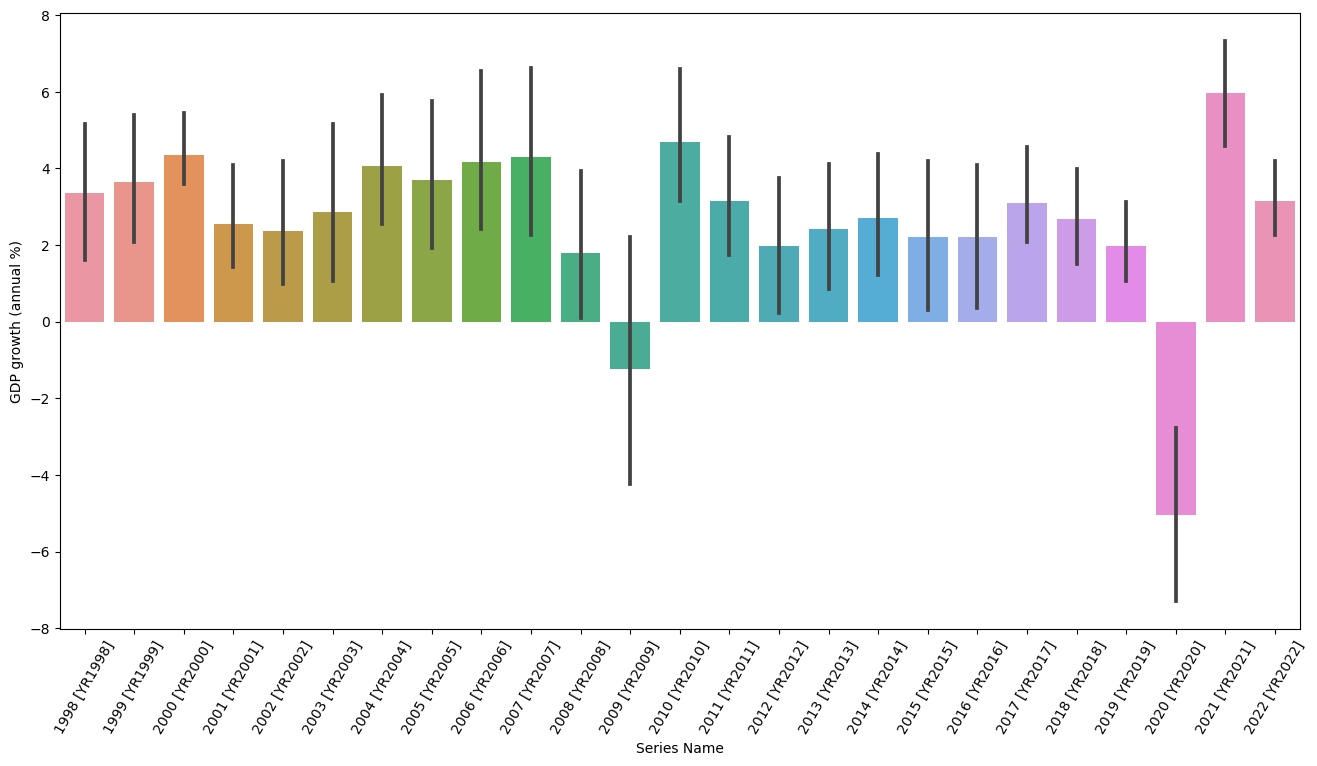

In [10]:
plt.figure(figsize=(16,8))
plot_df = top_gdp_countries_GDPPercent.sort_values('Series Name',ascending=True)
sns.barplot(data=plot_df.iloc[1:], x='Series Name', y='GDP growth (annual %)') 
plt.xticks(rotation=60)
plt.show()

GDP per capita per Year

In [11]:
top_gdp_percapita = gdp_df.sort_values('GDP per capita, PPP (current international $)',ascending=True)
top_gdp_percapita[['Country Name','Series Name','GDP per capita, PPP (current international $)']]

Country Name    Series Name  \
125          India  1998 [YR1998]   
126          India  1999 [YR1999]   
127          India  2000 [YR2000]   
128          India  2001 [YR2001]   
129          India  2002 [YR2002]   
..             ...            ...   
124        Germany  2022 [YR2022]   
247  United States  2020 [YR2020]   
246  United States  2019 [YR2019]   
248  United States  2021 [YR2021]   
249  United States  2022 [YR2022]   

     GDP per capita, PPP (current international $)  
125                                    1847.256696  
126                                    2001.634107  
127                                    2087.224776  
128                                    2197.109404  
129                                    2275.441506  
..                                             ...  
124                                   63149.598690  
247                                   63528.634300  
246                                   65120.394660  
248                                   70219.472450  
249                                   76398.591740  

[250 rows x 3 columns]

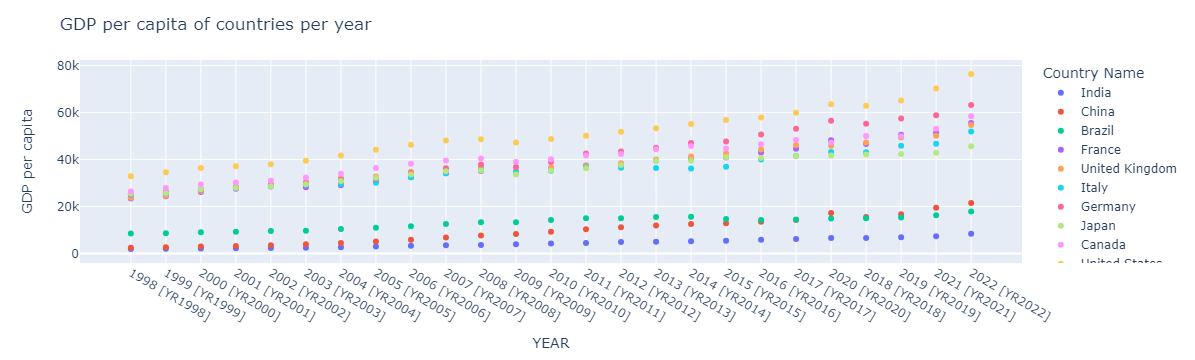

In [12]:
fig = px.scatter(top_gdp_percapita,x='Series Name', y='GDP per capita, PPP (current international $)', color='Country Name') 
fig.update_layout(title='GDP per capita of countries per year', xaxis_title='YEAR', yaxis_title='GDP per capita') 
fig.show()

<Axes: title={'center': 'GDP Per Capita by Country'}, xlabel='Series Name'>

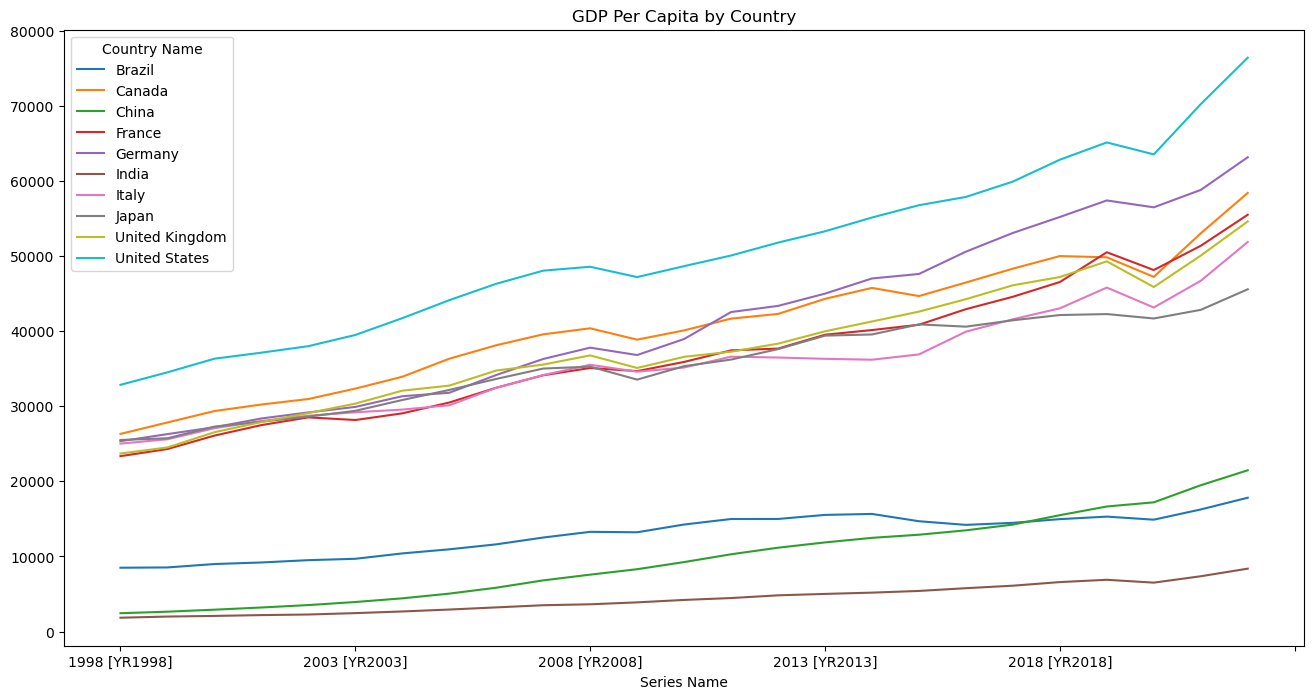

In [13]:
top_gdp_countries_GDPPerCapita = gdp_df.sort_values('GDP per capita, PPP (current international $)',ascending=False)
gdpcountry_graph=top_gdp_countries_GDPPerCapita.pivot(index='Series Name',columns='Country Name',values='GDP per capita, PPP (current international $)')
gdpcountry_graph.plot.line(figsize=(16,8),title='GDP Per Capita by Country')

Correlation Between Variables

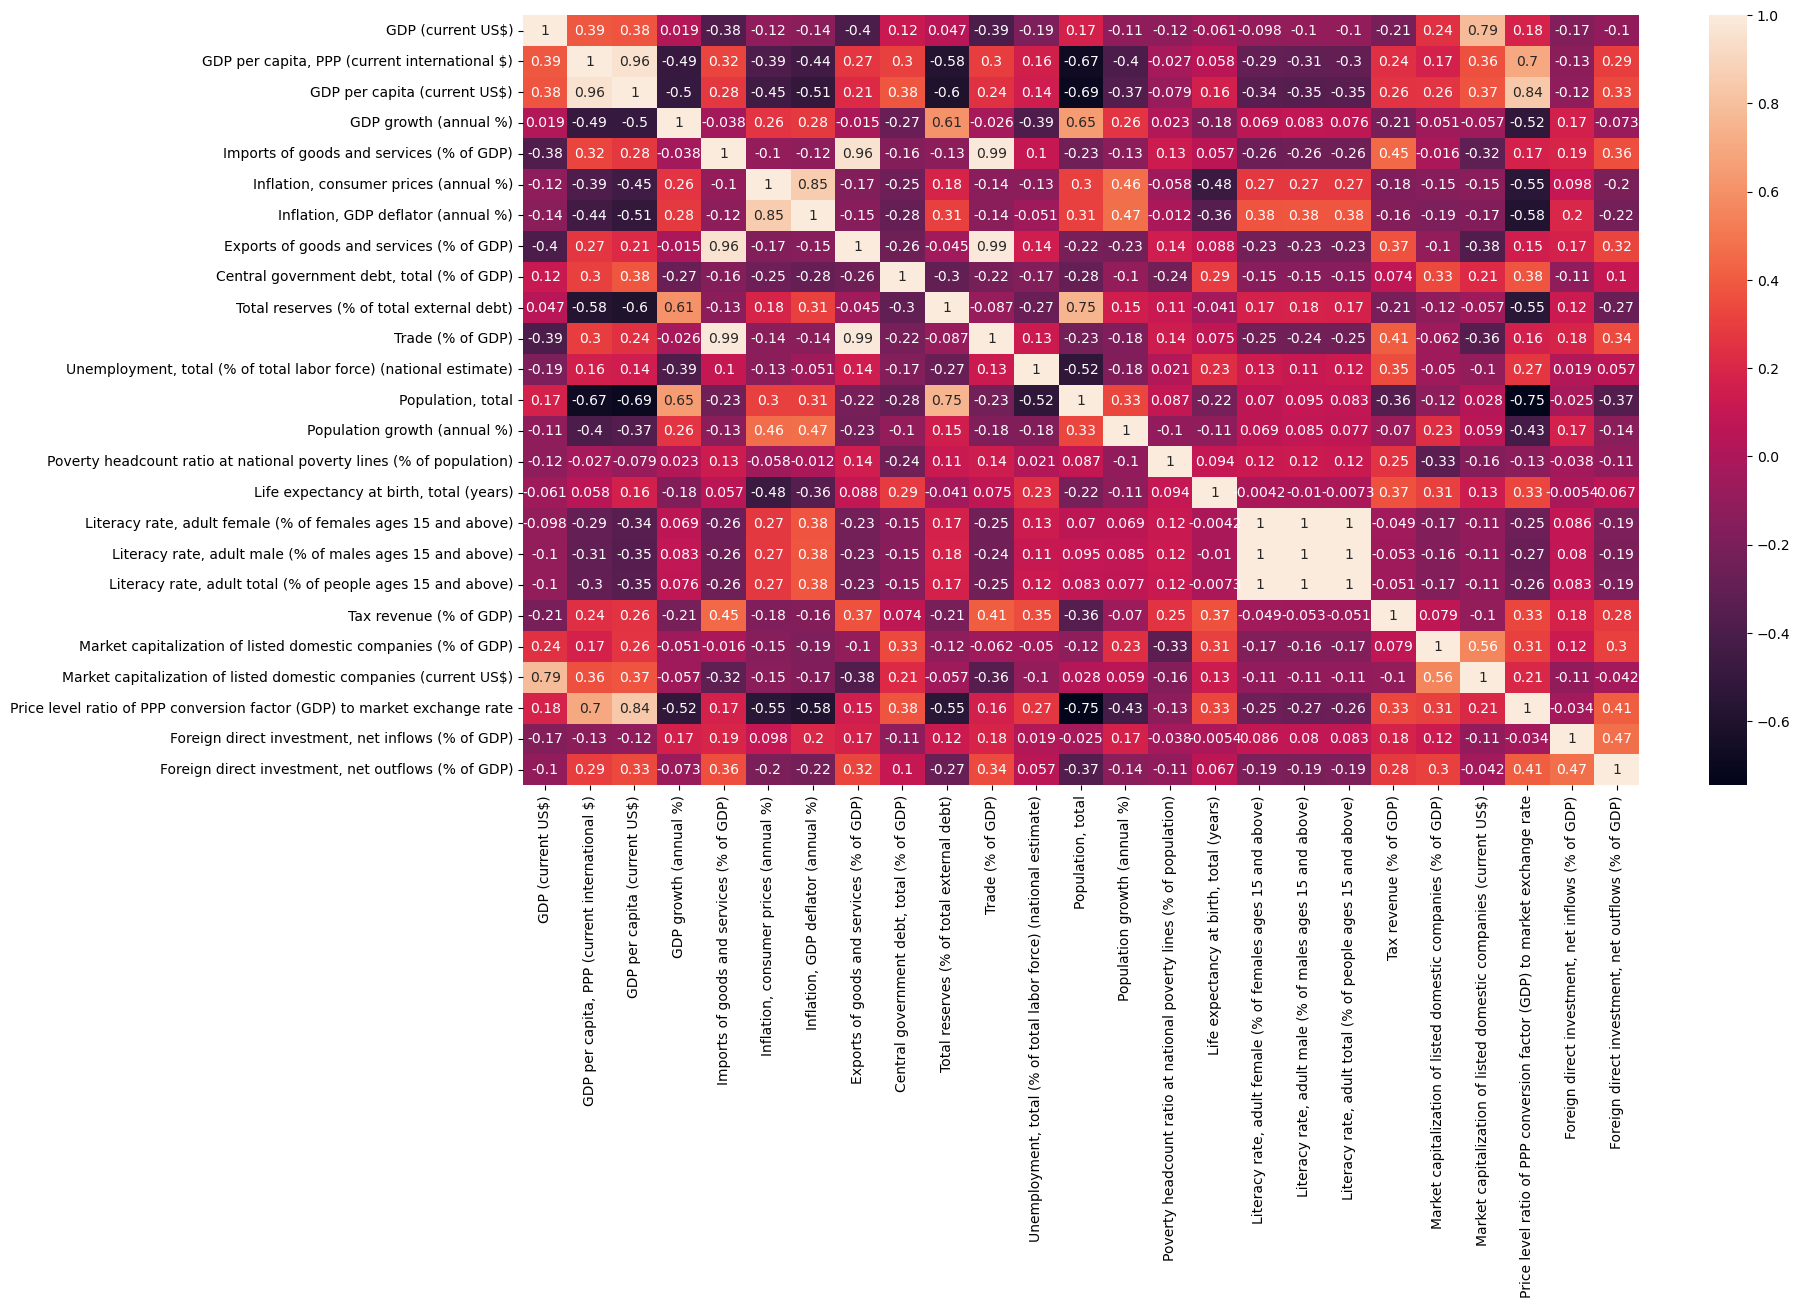

In [15]:
#we can visualize the above correlation using a heat map
sns.heatmap(gdp_df.corr(numeric_only=True), annot = True)
plt.rcParams['figure.figsize'] = (21,10)
plt.show()

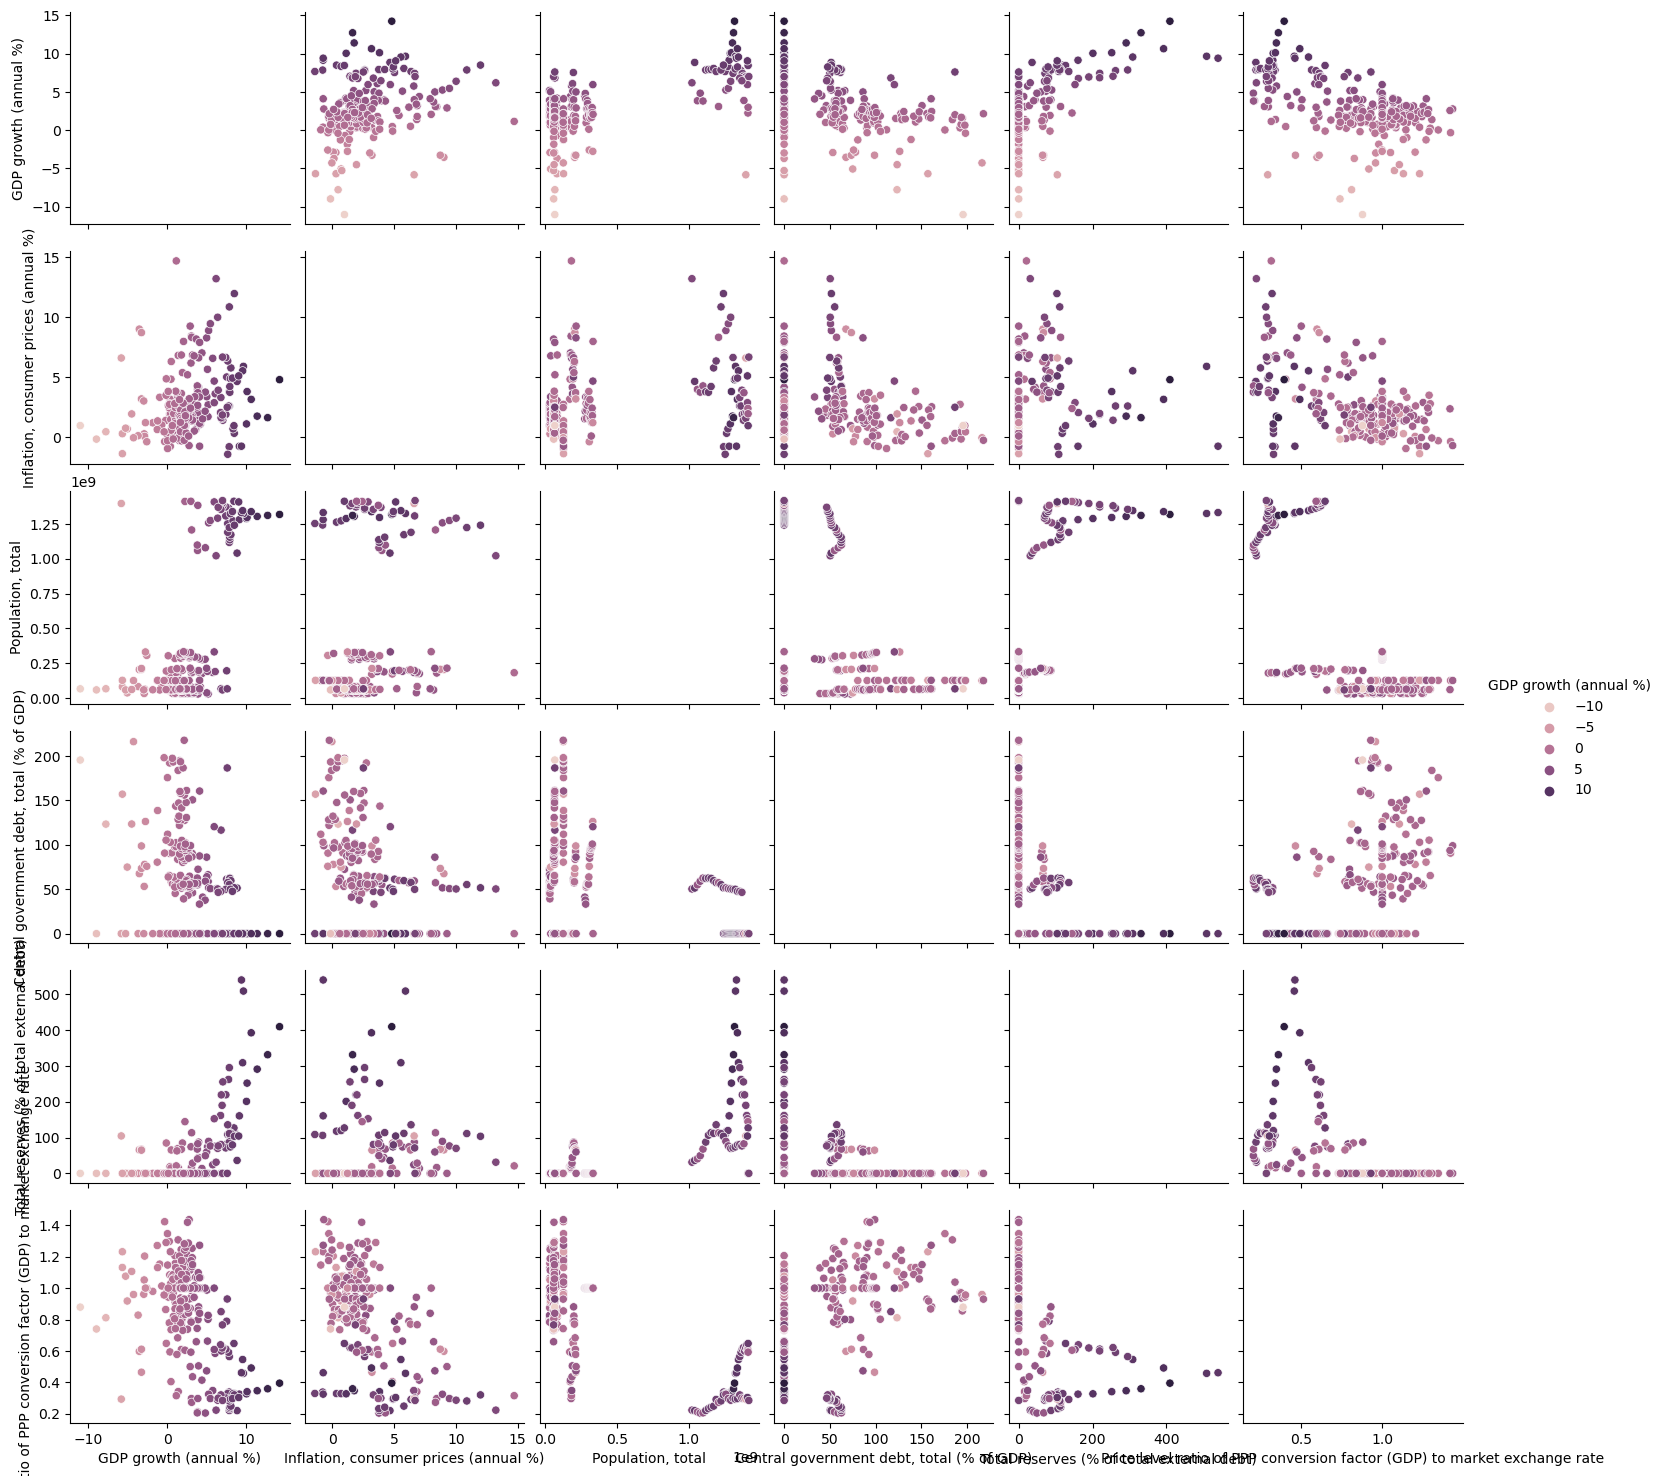

In [16]:
sns.pairplot(gdp_df, 
             vars=['GDP growth (annual %)','Inflation, consumer prices (annual %)','Population, total',
                       'Central government debt, total (% of GDP)','Total reserves (% of total external debt)','Price level ratio of PPP conversion factor (GDP) to market exchange rate'],
             hue= 'GDP growth (annual %)')
plt.rcParams['figure.figsize'] = (18,12)
plt.show()

 ## Top Factors that are affecting GDP are plotted as a Model below:
- Tax revenue (% of GDP)
- Trade (% of GDP)
- Population growth (annual %)
- Unemployment, total (% of total labor force) (national estimate)
- Foreign direct investment, net inflows (% of GDP)

### Modelling ###

Below we are using Ordinary Least Square Regression Models for the above economic indicators

In [17]:
model_gdp_df = gdp_df.replace(np.nan,0)
model_gdp_df

Country Name Country Code    Series Name  GDP (current US$)  \
0           Brazil          BRA  1998 [YR1998]       8.637110e+11   
1           Brazil          BRA  1999 [YR1999]       5.996420e+11   
2           Brazil          BRA  2000 [YR2000]       6.554480e+11   
3           Brazil          BRA  2001 [YR2001]       5.599840e+11   
4           Brazil          BRA  2002 [YR2002]       5.097950e+11   
..             ...          ...            ...                ...   
245  United States          USA  2018 [YR2018]       2.053310e+13   
246  United States          USA  2019 [YR2019]       2.138100e+13   
247  United States          USA  2020 [YR2020]       2.106050e+13   
248  United States          USA  2021 [YR2021]       2.331510e+13   
249  United States          USA  2022 [YR2022]       2.546270e+13   

     GDP per capita, PPP (current international $)  \
0                                      8503.697887   
1                                      8541.710725   
2                                      8994.743062   
3                                      9202.876484   
4                                      9510.823883   
..                                             ...   
245                                   62823.309440   
246                                   65120.394660   
247                                   63528.634300   
248                                   70219.472450   
249                                   76398.591740   

     GDP per capita (current US$)  GDP growth (annual %)  \
0                     5049.766120               0.338098   
1                     3456.423595               0.467938   
2                     3726.811420               4.387949   
3                     3142.235528               1.389896   
4                     2824.715396               3.053462   
..                            ...                    ...   
245                  62823.309440               2.945385   
246                  65120.394660               2.294439   
247                  63528.634300              -2.767803   
248                  70219.472450               5.945485   
249                  76398.591740               2.061593   

     Imports of goods and services (% of GDP)  \
0                                    9.408085   
1                                   11.417268   
2                                   12.451713   
3                                   14.564574   
4                                   13.387767   
..                                        ...   
245                                 15.249390   
246                                 14.579479   
247                                 13.181636   
248                                 14.588674   
249                                  0.000000   

     Inflation, consumer prices (annual %)  \
0                                 3.195076   
1                                 4.858447   
2                                 7.044141   
3                                 6.840359   
4                                 8.450164   
..                                     ...   
245                               2.442583   
246                               1.812210   
247                               1.233584   
248                               4.697859   
249                               8.002800   

     Inflation, GDP deflator (annual %)  \
0                              4.924362   
1                              8.010501   
2                              5.606065   
3                              8.225094   
4                              9.798112   
..                                  ...   
245                            2.404059   
246                            1.793931   
247                            1.304912   
248                            4.492792   
249                            7.005276   

     Exports of goods and services (% of GDP)  \
0                                    7.030500   
1                                    9.564898   
2

## OLS Applied for Trade

In [18]:
#set the dependant variables by loading the dataframe
gdp_data = model_gdp_df

#Prepare feature matrix and target variable
X = gdp_data[['Trade (% of GDP)']]
y = gdp_data['GDP growth (annual %)']

# Add a constant term to the feature matrix
#X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     GDP growth (annual %)   R-squared (uncentered):                   0.309
Model:                               OLS   Adj. R-squared (uncentered):              0.306
Method:                    Least Squares   F-statistic:                              111.1
Date:                   Thu, 12 Oct 2023   Prob (F-statistic):                    1.01e-21
Time:                           23:26:39   Log-Likelihood:                         -680.93
No. Observations:                    250   AIC:                                      1364.
Df Residuals:                        249   BIC:                                      1367.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

## OLS Applied for Population growth

In [19]:
#set the dependant variables by loading the dataframe
gdp_data = model_gdp_df

#Prepare feature matrix and target variable
X = gdp_data[['Population growth (annual %)']]
y = gdp_data['GDP growth (annual %)']

# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.069
Model:                               OLS   Adj. R-squared:                  0.065
Method:                    Least Squares   F-statistic:                     18.30
Date:                   Thu, 12 Oct 2023   Prob (F-statistic):           2.70e-05
Time:                           23:26:49   Log-Likelihood:                -661.41
No. Observations:                    250   AIC:                             1327.
Df Residuals:                        248   BIC:                             1334.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# OLS applied for Unemployment total % and FDI % as Multivariate Linear Regression

In [20]:
#set the dependant variables by loading the dataframe
gdp_data = model_gdp_df

#Prepare feature matrix and target variable
X = gdp_data[['Unemployment, total (% of total labor force) (national estimate)','Foreign direct investment, net inflows (% of GDP)']]
y = gdp_data['GDP growth (annual %)']

# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.181
Model:                               OLS   Adj. R-squared:                  0.174
Method:                    Least Squares   F-statistic:                     27.27
Date:                   Thu, 12 Oct 2023   Prob (F-statistic):           1.99e-11
Time:                           23:27:03   Log-Likelihood:                -645.37
No. Observations:                    250   AIC:                             1297.
Df Residuals:                        247   BIC:                             1307.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

## OLS Applied for Tax Revenue

In [21]:
#set the dependant variables by loading the dataframe
gdp_data = model_gdp_df

#Prepare feature matrix and target variable
X = gdp_data[['Tax revenue (% of GDP)']]
y = gdp_data['GDP growth (annual %)']

# Add a constant term to the feature matrix
#X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     GDP growth (annual %)   R-squared (uncentered):                   0.156
Model:                               OLS   Adj. R-squared (uncentered):              0.153
Method:                    Least Squares   F-statistic:                              46.03
Date:                   Thu, 12 Oct 2023   Prob (F-statistic):                    8.44e-11
Time:                           23:27:12   Log-Likelihood:                         -705.86
No. Observations:                    250   AIC:                                      1414.
Df Residuals:                        249   BIC:                                      1417.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]

# Residual Plots

In [22]:
residuals=results.resid
residuals

0      0.338098
1      0.467938
2      4.387949
3      1.389896
4      3.053462
         ...   
245    1.793132
246    1.146052
247   -3.936296
248    4.650363
249    2.061593
Length: 250, dtype: float64

# Normality
We can check the normalilty assumption by checking normality on the residuals. We can do this using either a histogram or QQ-plot (and more formally with a hypothesis test).

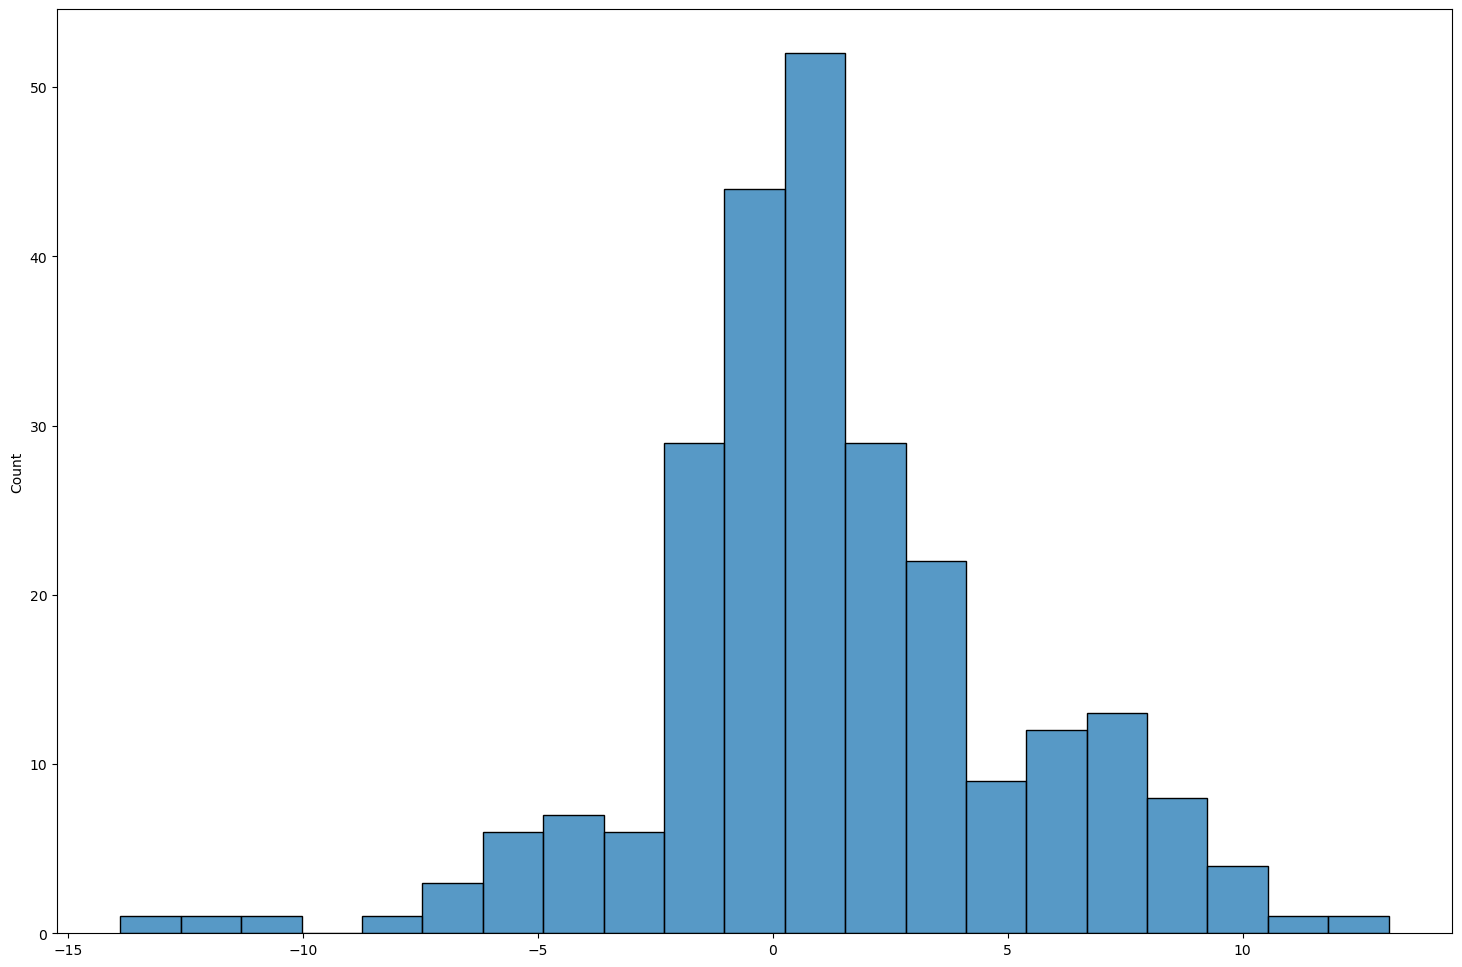

In [23]:
sns.histplot(residuals)
plt.show()

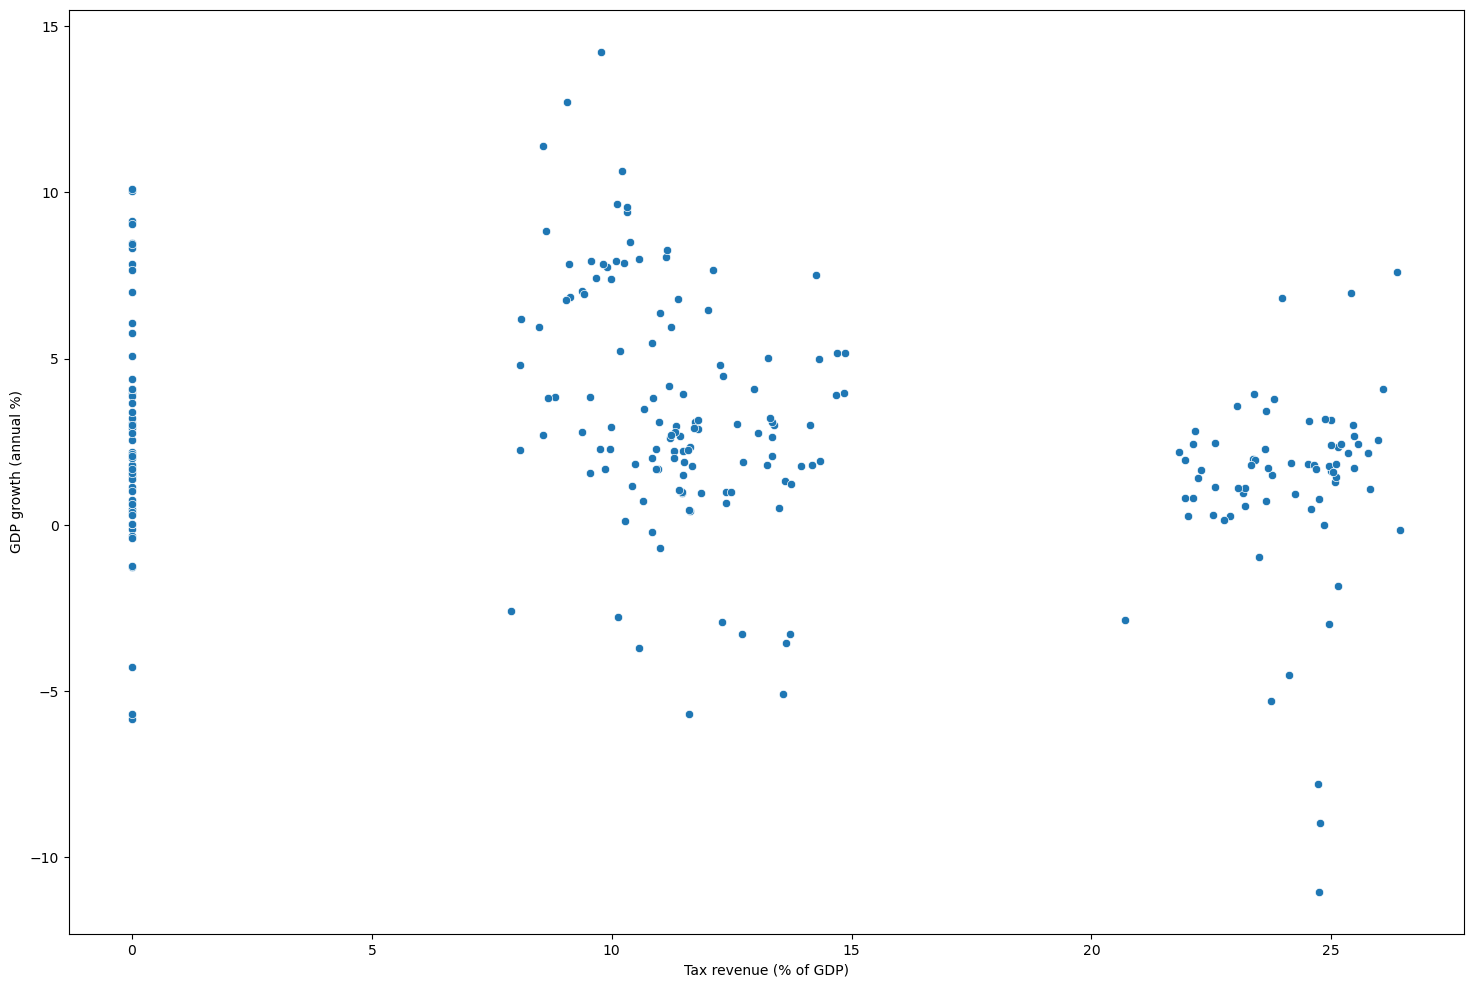

In [24]:
sns.scatterplot(data=gdp_data, x='Tax revenue (% of GDP)', y='GDP growth (annual %)')
plt.show()

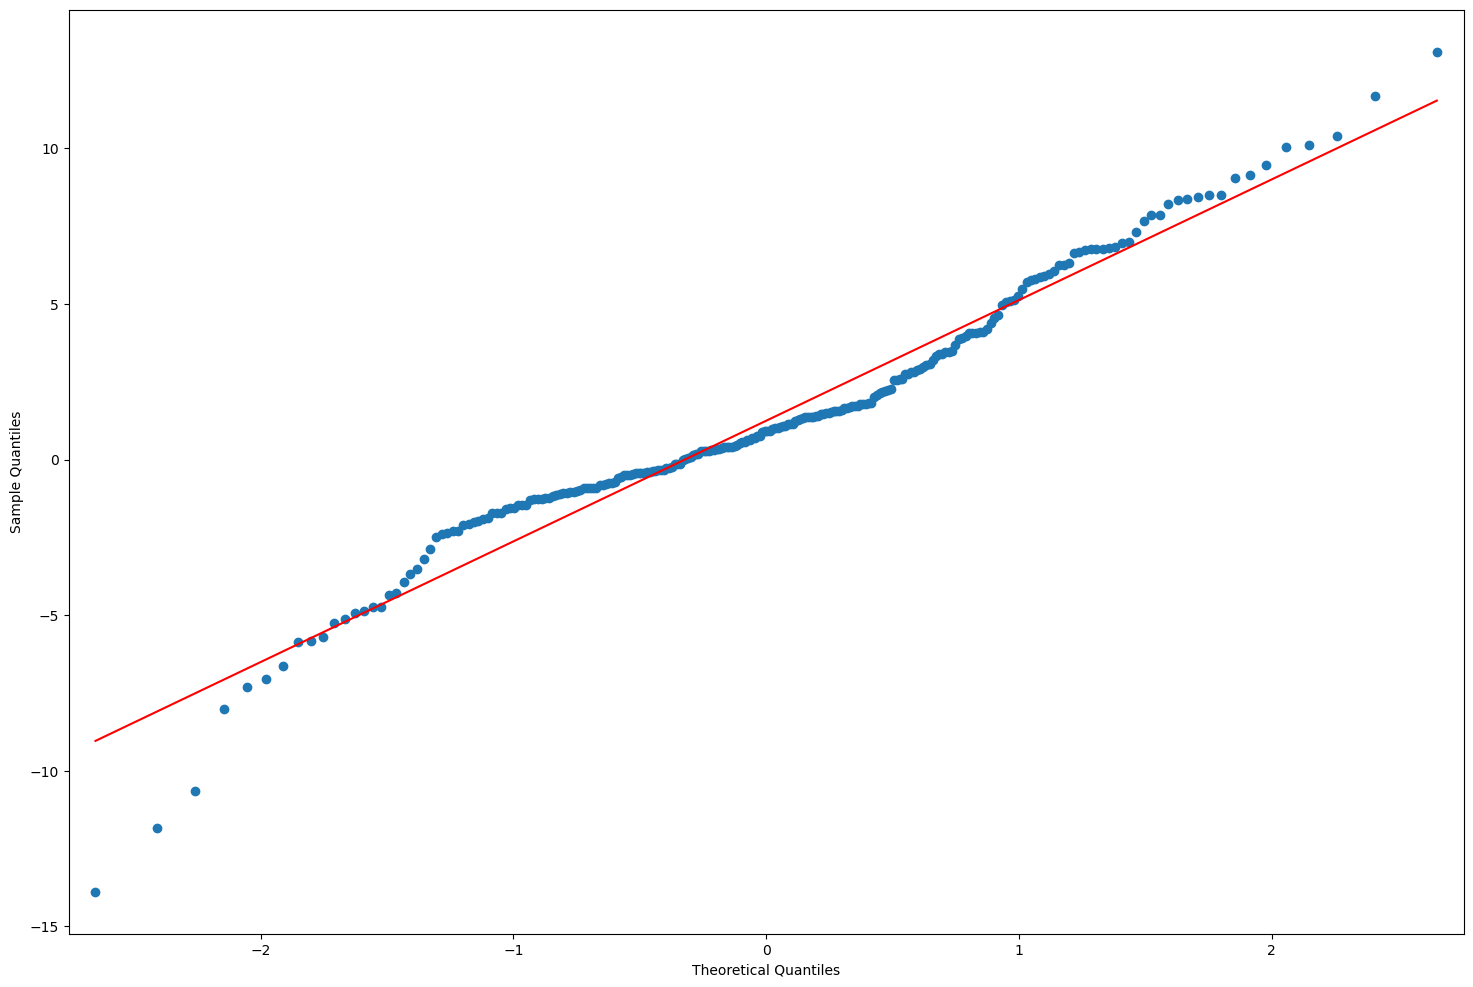

In [25]:
sm.qqplot(residuals,line='r')
plt.show()

In [26]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9671567678451538, pvalue=1.649241312406957e-05)

Since the P value is low, the null hypothesis is rejected. Which means the residuals that we consider for modelling are not normally distributed. The normality of the residuals is violated

## Homoscedasticity

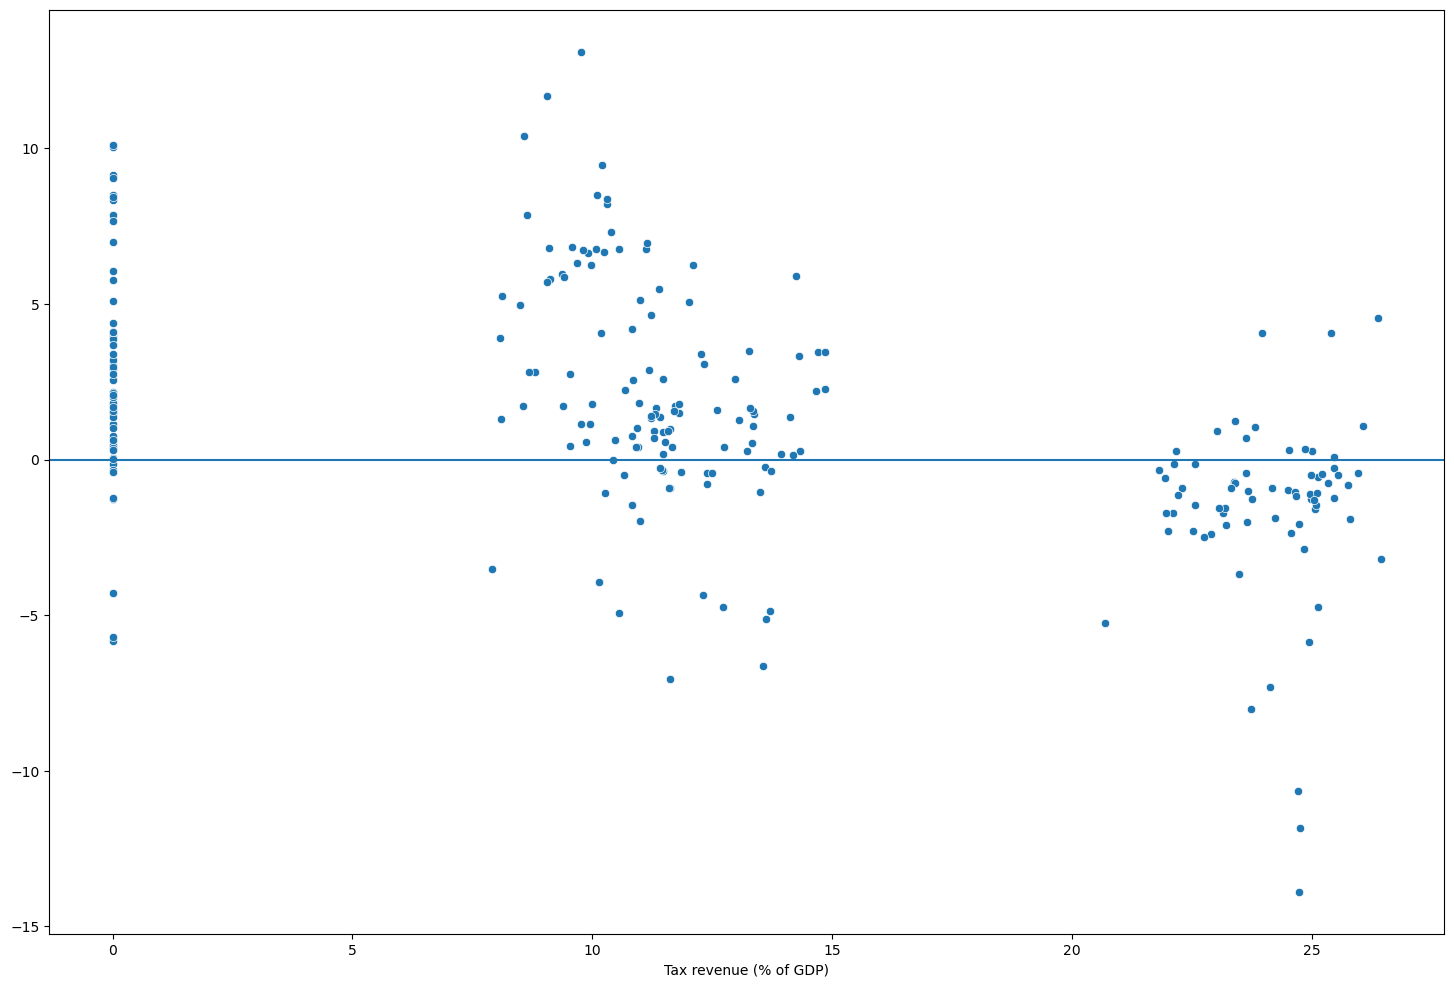

In [27]:
ax = sns.scatterplot(x=gdp_data['Tax revenue (% of GDP)'], y=residuals)
ax.axhline(0)

We can also use the Breusch-Pagan test (among others) to formally test homoscedasticity.

- H0: Homoscedasticity is present (the residuals are distributed with equal variance)
- Ha: Homoscedasticity is not present(the residuals are not distributed with equal variance)

Homoscedasticity assumption is satisfied.

In [29]:
results.params

Tax revenue (% of GDP)    0.11529
dtype: float64

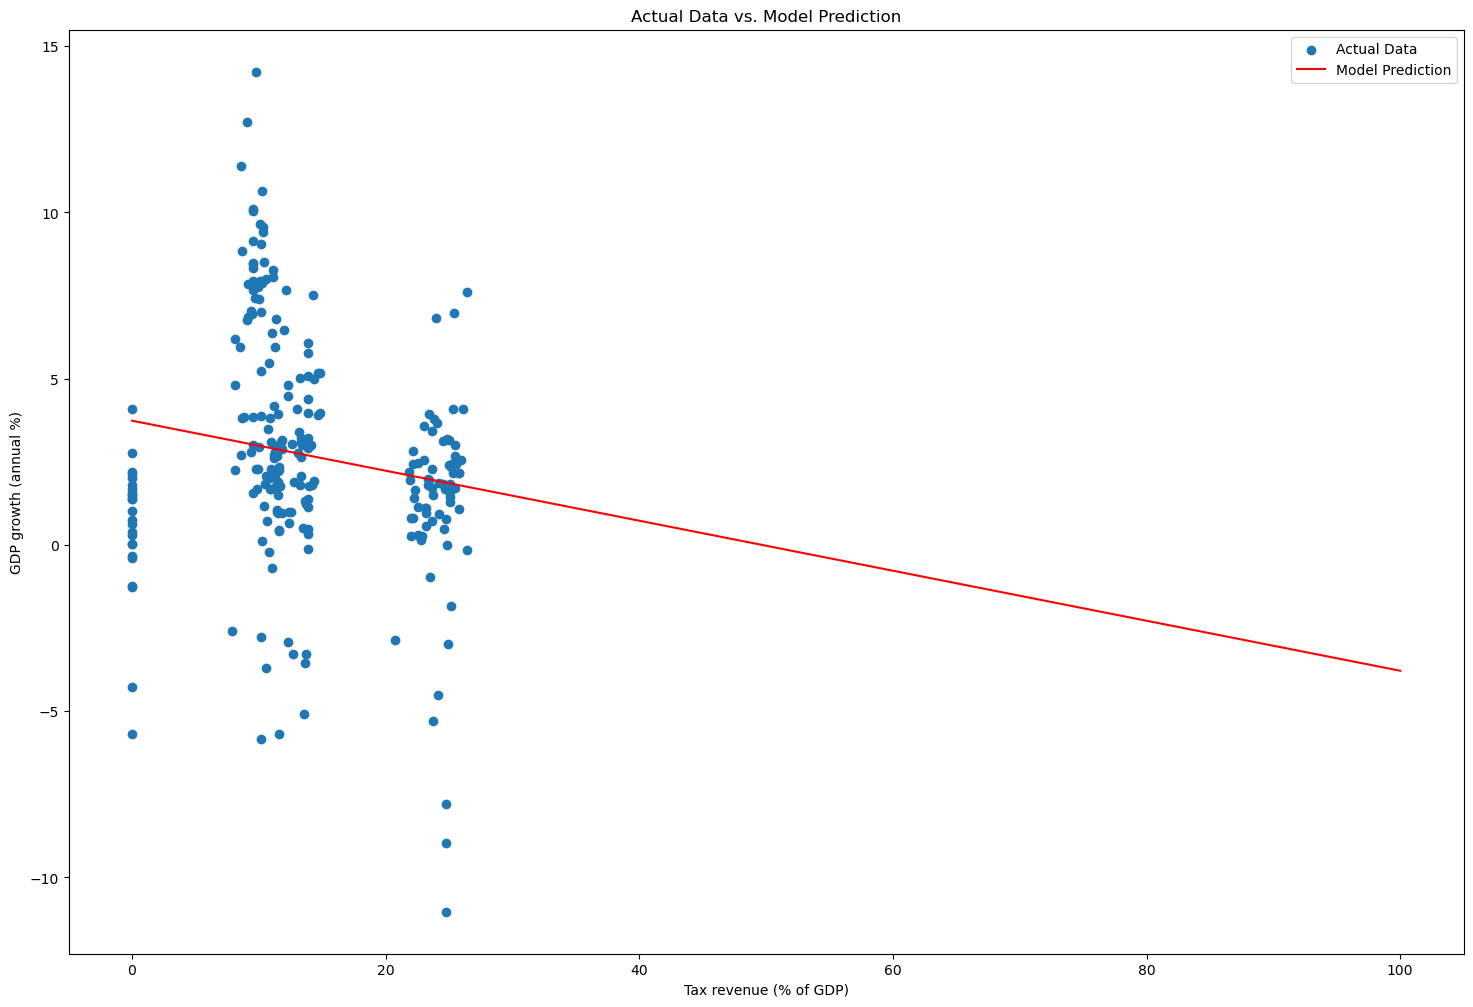

In [33]:
new_X = pd.DataFrame({'const' : [1]*100,
                      'X' : np.linspace(start=0, stop=100, num=100)})

predictions = results.predict(new_X, transform=True)

# Create a scatter plot of actual data
plt.scatter(X['Tax revenue (% of GDP)'], y, label='Actual Data')

# Plot the predicted values
plt.plot(new_X['X'], predictions, color='red', label='Model Prediction')

# Add labels and legend
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('GDP growth (annual %)')
plt.legend()
plt.title('Actual Data vs. Model Prediction')
plt.show()

Based on the above analysis it is very much evident that Top GDP countries have various economic factors influence, some of them are:
- Tax Revenue (%)
- Trade (%)
- Unemployment (%)
- Population Growth (%)
- Foreign Direct Investment (FDI) (%)

# References

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit
- Statsmodels
- Scipy
- Plotly